In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
# before cleaning-51717 rows, 17 columns

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#removing dupicates

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51717, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
new_data=df.drop(['url','address','phone','dish_liked','reviews_list'],axis=1)

In [11]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [12]:
new_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
def handle_rate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)

new_data['rate']=new_data['rate'].apply(handle_rate)
new_data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [14]:
#filling null values by mean of the column

new_data['rate'].fillna(new_data['rate'].mean(), inplace=True)
new_data['rate'].isnull().sum()

0

In [15]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   menu_item                    51717 non-null  object 
 10  listed_in(type)              51717 non-null  object 
 11  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [16]:
new_data['location'].isnull().sum()

21

In [17]:
new_data['location'].dropna()

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51696, dtype: object

In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   menu_item                    51717 non-null  object 
 10  listed_in(type)              51717 non-null  object 
 11  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [19]:
#dropping null values

new_data.dropna(inplace=True)
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [20]:
#renaming the column name

new_data.rename(columns={'approx_cost(for two people)':'cost3plates','listed_in(type)':'type', 'listed_in(city)' : 'area'},inplace=True)
new_data.head()



,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost3plates,menu_item,type,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [21]:
new_data.rename(columns={'city':'area'},inplace=True)
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost3plates,menu_item,type,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [22]:
new_data.rename(columns={'cost3plates':'cost2plates'},inplace=True)
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [23]:
new_data['location'].unique()


array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [24]:
new_data['area'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [25]:
new_data=new_data.drop(['area'],axis=1)

In [26]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet


In [27]:
new_data['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [28]:
#removing commas from data

def handle_comma(value):
    value=str(value)
    if',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

new_data['cost2plates']=new_data['cost2plates'].apply(handle_comma)


In [29]:
new_data['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [30]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [31]:
#cleaning rest_type column

new_data['rest_type'].value_counts()

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [32]:
rest_types=new_data['rest_type'].value_counts(ascending=False)


In [33]:
rest_types

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [34]:
rest_typeslessthan1000=rest_types[rest_types<1000]
rest_typeslessthan1000

rest_type
Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [35]:
#function for joing rest_type less than 1000 to others

def handle_rest_type(value):
    if value in rest_typeslessthan1000:
        return 'Others'
    else:
        return value

new_data['rest_type']=new_data['rest_type'].apply(handle_rest_type)
new_data['rest_type']

0        Casual Dining
1        Casual Dining
2               Others
3          Quick Bites
4        Casual Dining
             ...      
51712           Others
51713           Others
51714           Others
51715           Others
51716           Others
Name: rest_type, Length: 51148, dtype: object

In [36]:
new_data['rest_type'].value_counts()

rest_type
Quick Bites           19046
Casual Dining         10273
Others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: count, dtype: int64

In [37]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [38]:
#cleaning location column

In [39]:
new_data['location'].value_counts()

location
BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [40]:
location=new_data['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]

def handle_location(value):
    if value in location_lessthan300:
        return 'others'
    else:
        return value

new_data['location']=new_data['location'].apply(handle_location)
new_data['location']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715          others
51716          others
Name: location, Length: 51148, dtype: object

In [41]:
new_data['location'].value_counts()

location
BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
L

In [42]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet


In [43]:
#cleaning cusines columns

In [44]:
new_data['cuisines'].value_counts()

cuisines
North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2704, dtype: int64

In [45]:
cuisines=new_data['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return 'others'
    else:
        return value

new_data['cuisines']=new_data['cuisines'].apply(handle_cuisines)
new_data['cuisines']

0        North Indian, Mughlai, Chinese
1                                others
2                                others
3            South Indian, North Indian
4                                others
                      ...              
51712                       Continental
51713                       Finger Food
51714                       Finger Food
51715                       Finger Food
51716                            others
Name: cuisines, Length: 51148, dtype: object

In [46]:
new_data['cuisines'].value_counts()

cuisines
others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [47]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,menu_item,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,[],Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,others,800.0,[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,[],Buffet


In [48]:
new_data['type'].value_counts()

type
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

In [49]:
new_data['menu_item'].value_counts()

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [50]:
new_data=new_data.drop(['menu_item'],axis=1)

In [51]:
new_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


#visulazation of data

Text(0.5, 1.0, 'Count of resturants in a particular location')

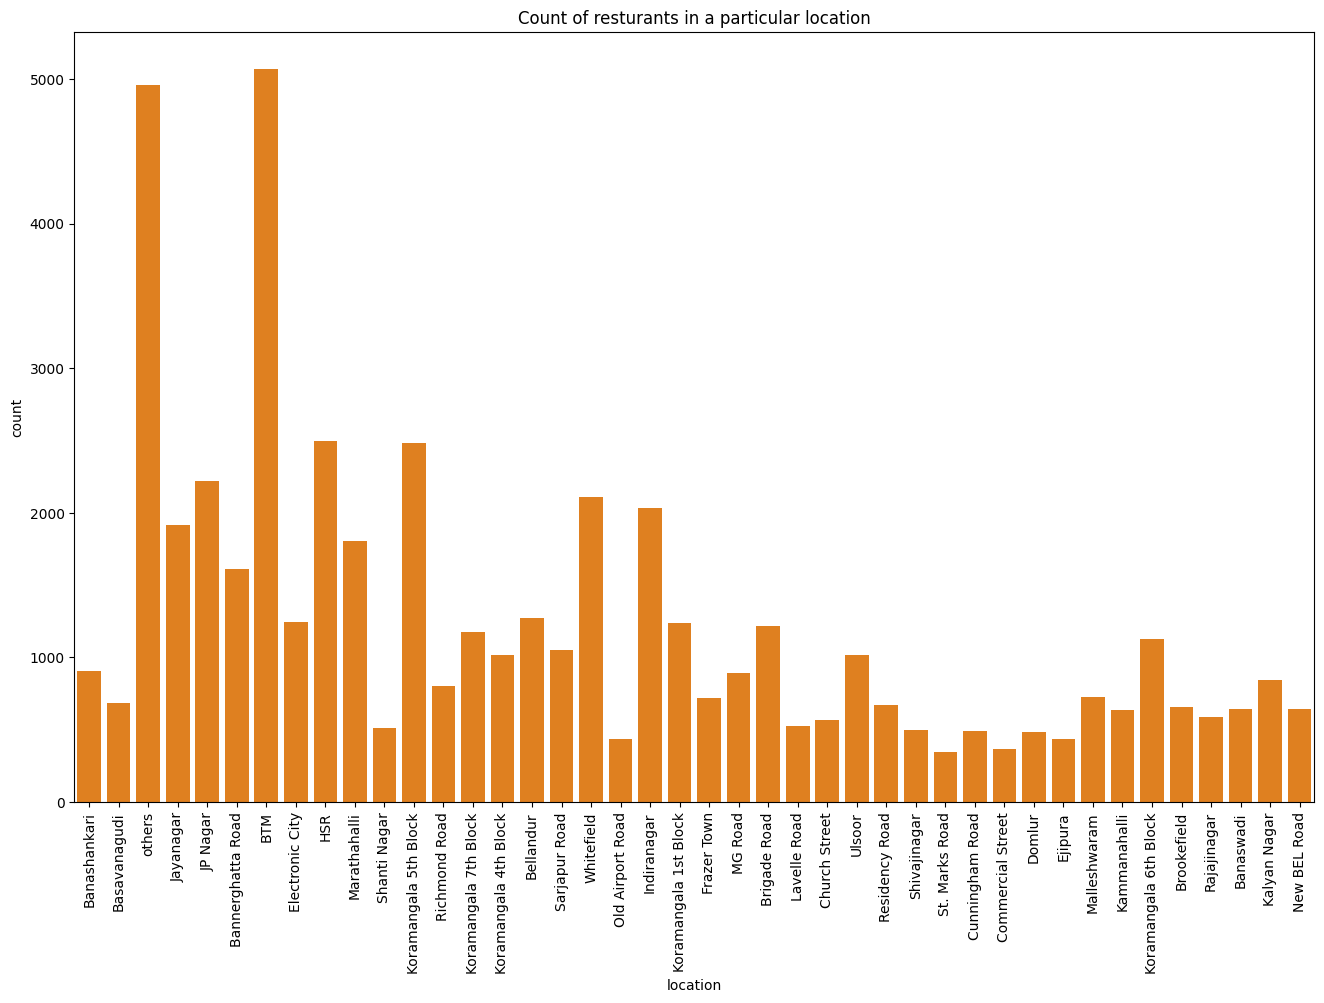

In [52]:
#count plot for location

plt.figure(figsize=(16,10))
ax=sns.countplot(x=new_data['location'],color=(1,0.5,0))
plt.xticks(rotation=90)
plt.title('Count of resturants in a particular location')

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_3228\3636298115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_data['online_order'],palette='dark')


Text(0.5, 1.0, 'Count of resturants having/not having online orders')

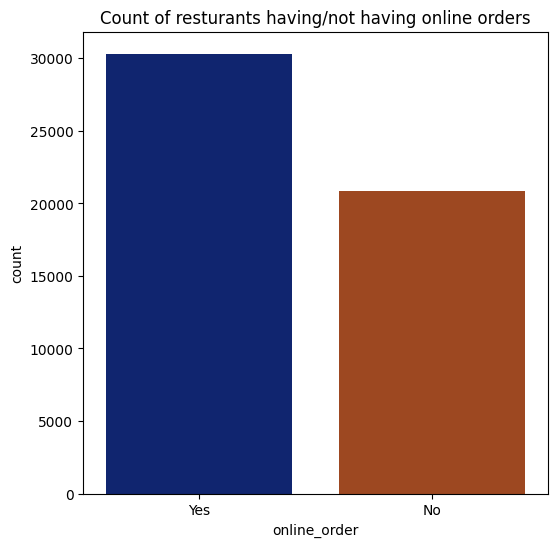

In [90]:
#visualizing online order

plt.figure(figsize=(6,6))
sns.countplot(x=new_data['online_order'],palette='dark')
plt.title('Count of resturants having/not having online orders')

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_12996\529591312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_data['book_table'],palette='rainbow')


Text(0.5, 1.0, 'Count of resturants having/not having online orders')

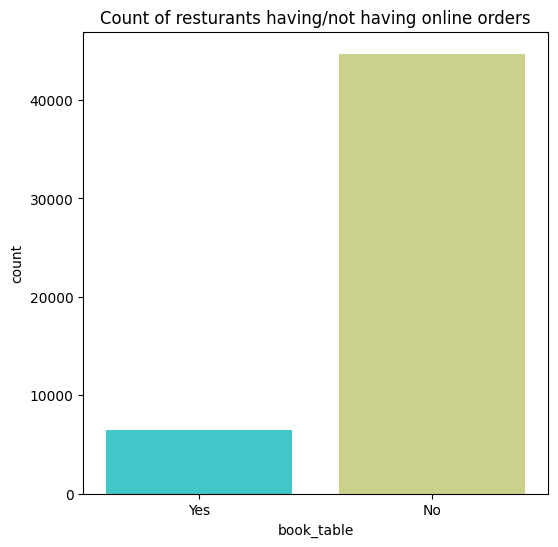

In [55]:
#count of resturants for booking tables

plt.figure(figsize=(6,6))
sns.countplot(x=new_data['book_table'],palette='rainbow')
plt.title('Count of resturants having/not having online orders')

Text(0.5, 1.0, 'online order v/s rate')

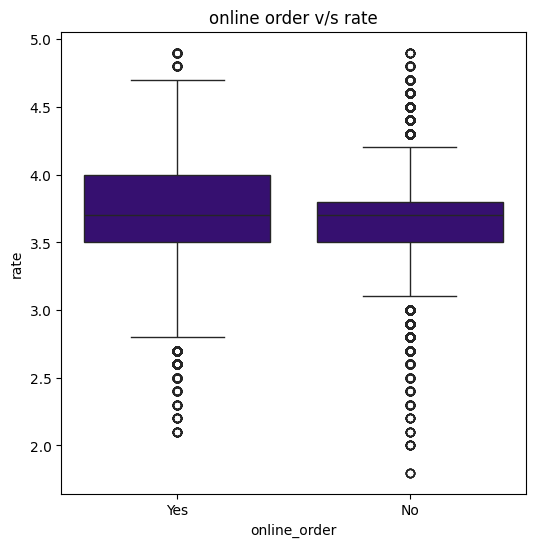

In [61]:
#visualizing online order v/s rate


plt.figure(figsize=[6,6])
sns.boxplot(x='online_order', y='rate',data=new_data,color=(0.2,0,0.5))
plt.title('online order v/s rate')

Text(0.5, 1.0, 'table booking facility v/s rate')

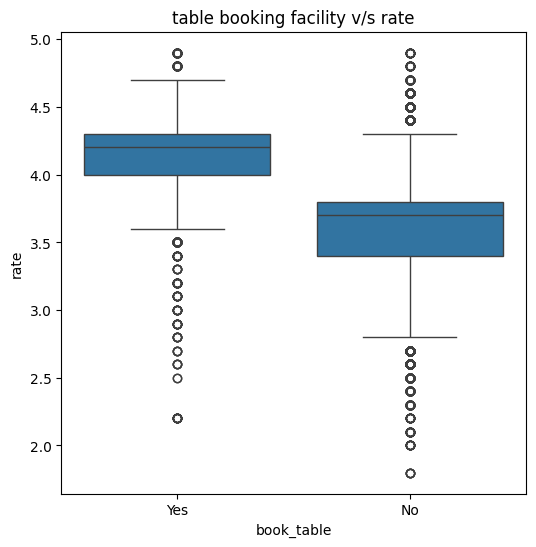

In [68]:
#visualizing table booking v/s rate


plt.figure(figsize=[6,6])
sns.boxplot(x='book_table', y='rate',data=new_data)
plt.title('table booking facility v/s rate')

In [70]:
#online order facility according to location

df1=new_data.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None, index=['location'],columns=['online_order'])
df1

name        
online_order               No     Yes
location                             
BTM                    1766.0  3305.0
Banashankari            397.0   507.0
Banaswadi               302.0   343.0
Bannerghatta Road       687.0   924.0
Basavanagudi            243.0   441.0
Bellandur               519.0   752.0
Brigade Road            553.0   665.0
Brookefield             239.0   417.0
Church Street           226.0   343.0
Commercial Street       228.0   142.0
Cunningham Road         168.0   323.0
Domlur                  247.0   235.0
Ejipura                 214.0   220.0
Electronic City         676.0   572.0
Frazer Town             288.0   432.0
HSR                     585.0  1911.0
Indiranagar             701.0  1332.0
JP Nagar                911.0  1308.0
Jayanagar               552.0  1364.0
Kalyan Nagar            350.0   491.0
Kammanahalli            265.0   375.0
Koramangala 1st Block   384.0   853.0
Koramangala 4th Block   459.0   558.0
Koramangala 5th Block   867.0  1614.0
Koramangala 6th Block   445.0   684.0
Koramangala 7th Block   390.0   786.0
Lavelle Road            317.0   206.0
MG Road                 520.0   374.0
Malleshwaram            309.0   415.0
Marathahalli            701.0  1107.0
New BEL Road            255.0   389.0
Old Airport Road        221.0   216.0
Rajajinagar             286.0   305.0
Residency Road          426.0   248.0
Richmond Road           557.0   247.0
Sarjapur Road           324.0   725.0
Shanti Nagar            289.0   222.0
Shivajinagar            354.0   145.0
St. Marks Road          176.0   167.0
Ulsoor                  389.0   628.0
Whitefield              986.0  1123.0
others                 2065.0  2897.0

Text(0.5, 1.0, 'online order facility according to location')

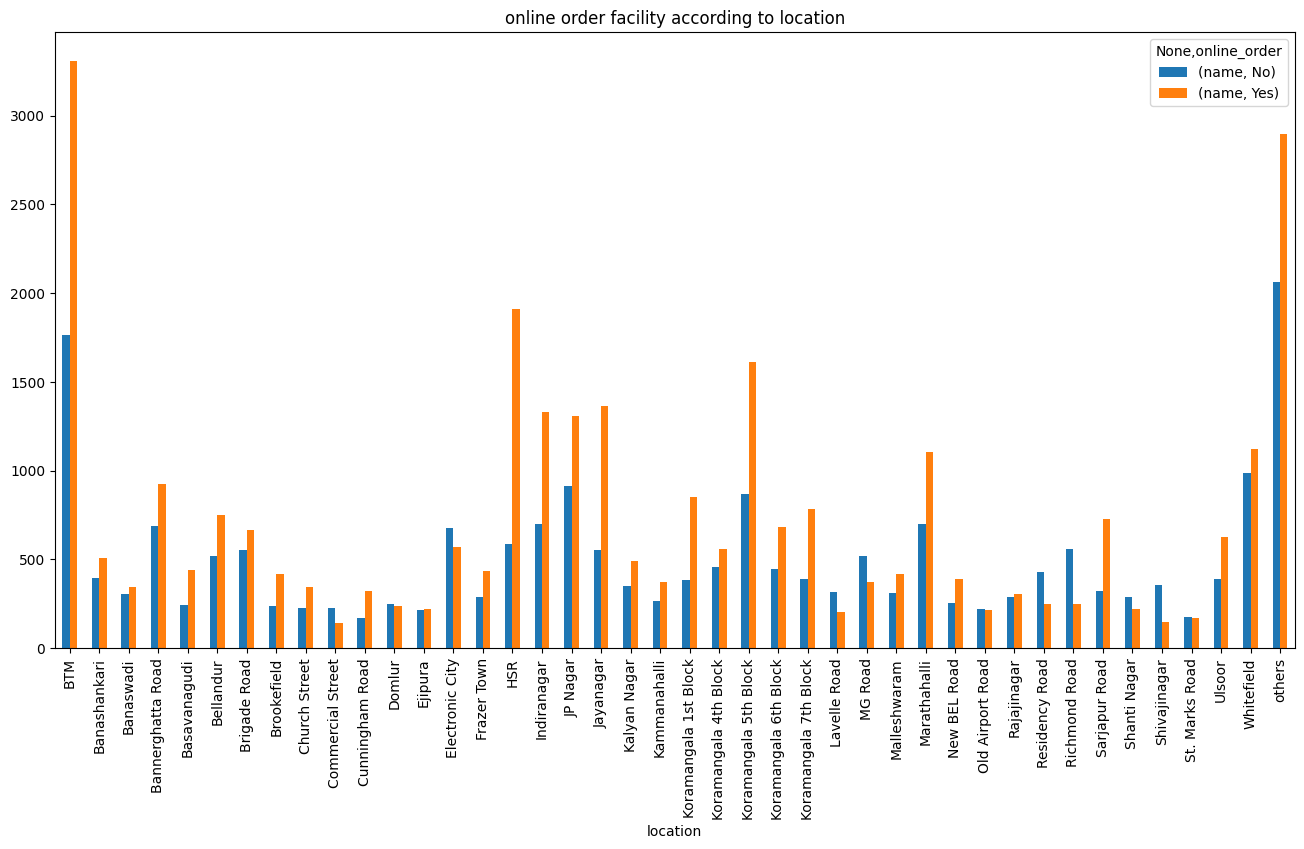

In [77]:

df1.plot(kind='bar',figsize=(16,8))
plt.title('online order facility according to location')

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_12996\3905694378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type',y='rate', data=new_data, palette='inferno')


<Axes: xlabel='type', ylabel='rate'>

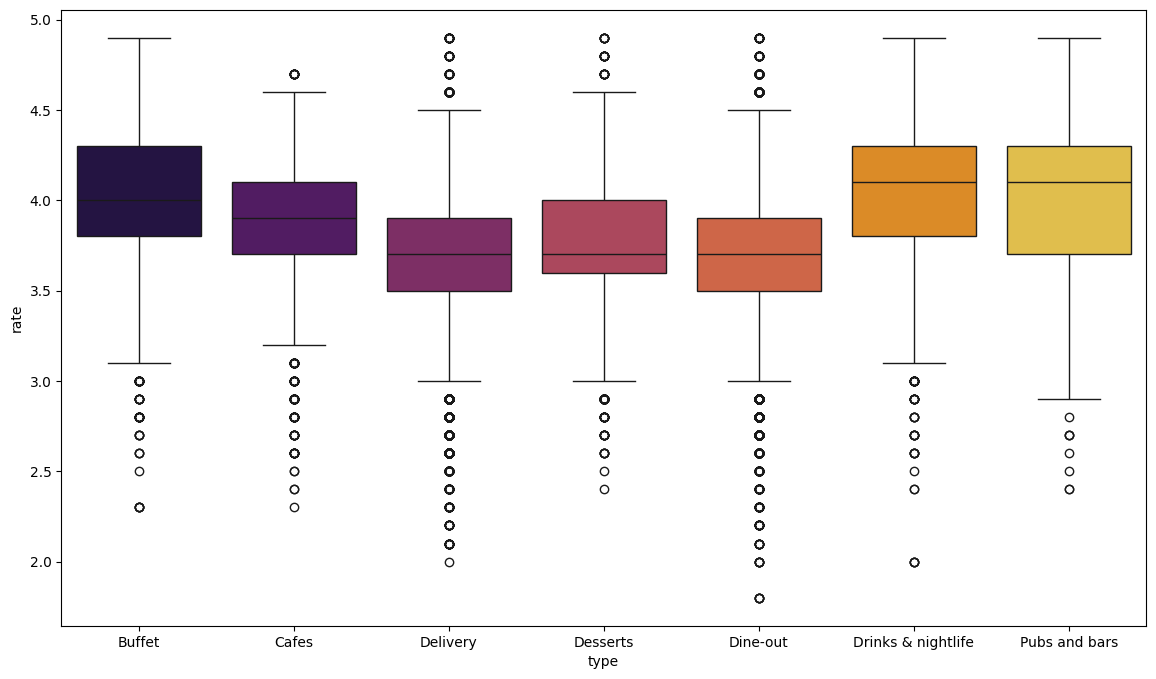

In [79]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate', data=new_data, palette='inferno')

In [80]:
#no of votes location wise

df2=new_data[['location','votes']]
df2.drop_duplicates()
df3=df2.groupby(['location'])['votes'].sum()
df3=df3.to_frame()
df3=df3.sort_values('votes', ascending=False)
df3.head()

,votes
location,
Koramangala 5th Block,2214827
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594979
JP Nagar,586522


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_12996\27533792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df3['votes'],palette='summer')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text

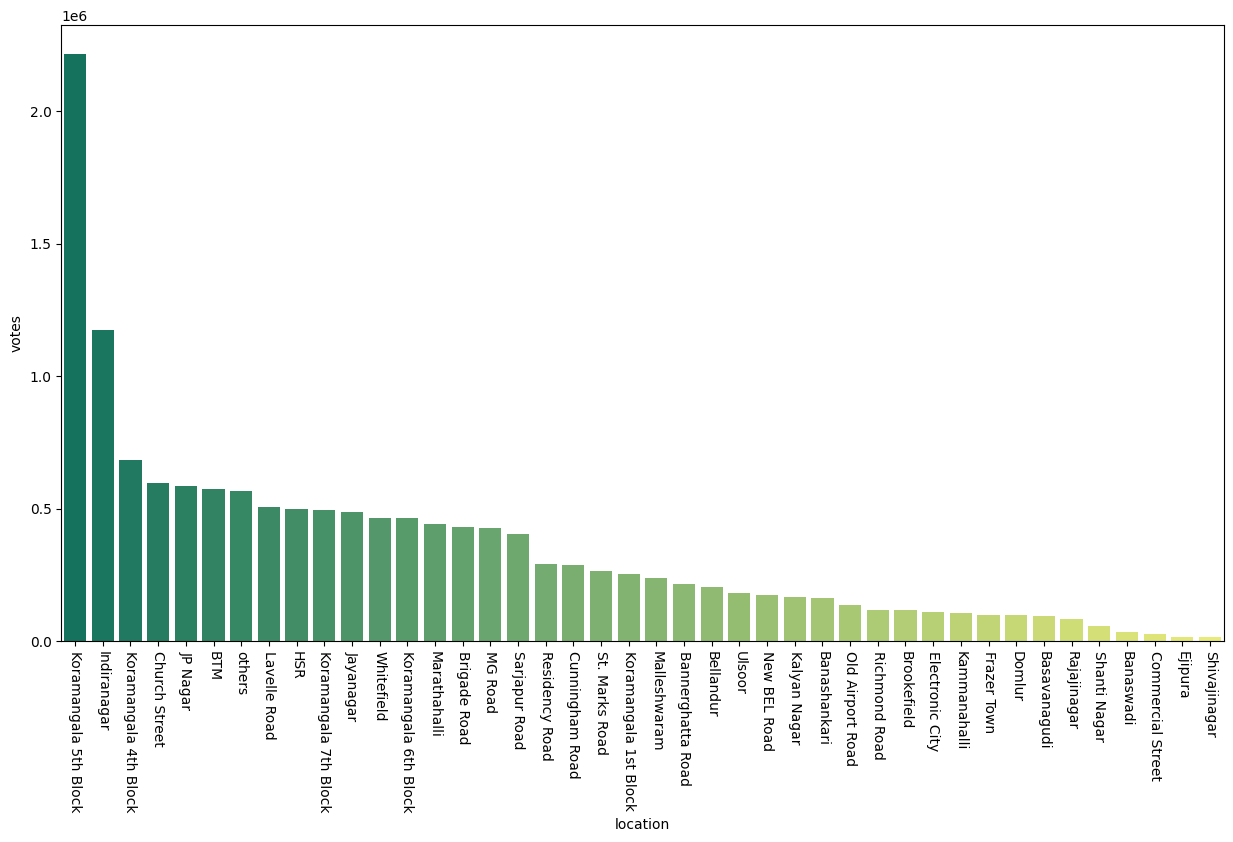

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(df3['votes'],palette='summer')
plt.xticks(rotation=270)

In [104]:
#visualizing top cusine resturants

df4=new_data[['cuisines','votes']]
df4.drop_duplicates()
df5=df4.groupby(['cuisines'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()
                

,votes
cuisines,
others,11589734
North Indian,516346
"North Indian, Chinese",258587
South Indian,161983
"North Indian, Mughlai",103738


In [106]:
#remvoing others
df5=df5.iloc[1:,:]
df5.head()

,votes
cuisines,
"North Indian, Chinese",258587
South Indian,161983
"North Indian, Mughlai",103738
Chinese,101736
Cafe,89986


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_12996\1877940526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df5['votes'],palette='summer_r')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 [Text(0, 0, 'North Indian, Chinese'),
  Text(1, 0, 'South Indian'),
  Text(2, 0, 'North Indian, Mughlai'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Cafe'),
  Text(5, 0, 'North Indian, South Indian'),
  Text(6, 0, 'Desserts'),
  Text(7, 0, 'Chinese, Momos'),
  Text(8, 0, 'Ice Cream, Desserts'),
  Text(9, 0, 'Cafe, Continental'),
  Text(10, 0, 'Biryani, North Indian, Chinese'),
  Text(11, 0, 'Chinese, Thai, Momos'),
  Text(12, 0, 'South Indian, North Indian, Chinese'),
  Text(13, 0, 'Desserts, Beverages'),
  Text(14, 0, 'Biryani'),
  Text(15, 0, 'Finger Food'),
  Text(16, 0, 'Bakery, Desserts'),
 

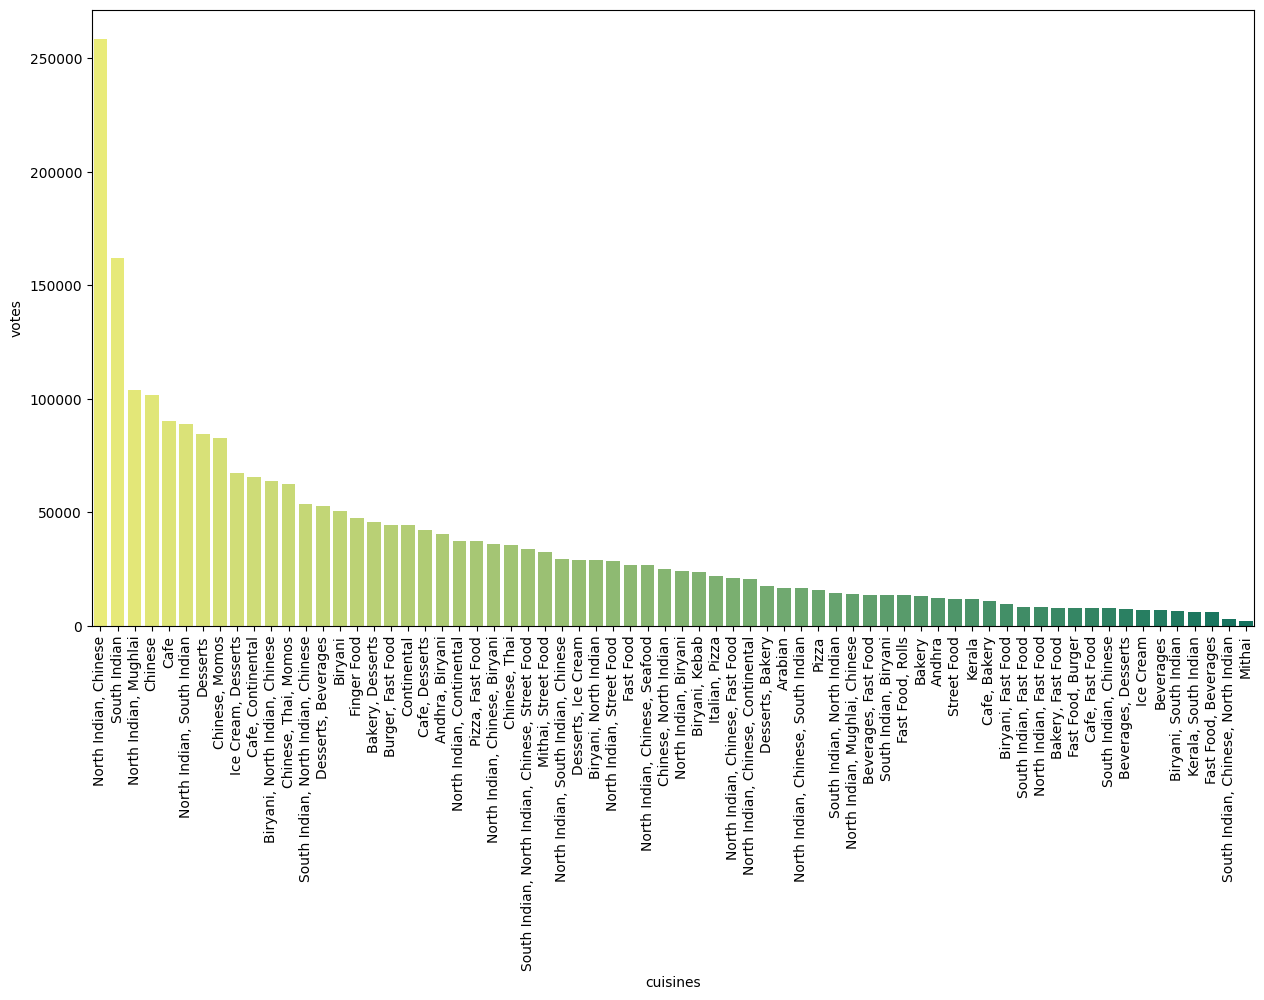

In [114]:

plt.figure(figsize=(15,8))
sns.barplot(df5['votes'],palette='summer_r')
plt.xticks(rotation=90)